In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url).drop("Unnamed: 0",axis=1)

## Columns
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:>

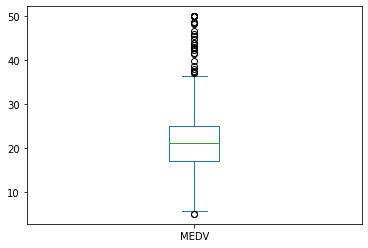

In [67]:
boston_df.MEDV.plot.box()

<AxesSubplot:xlabel='CHAS'>

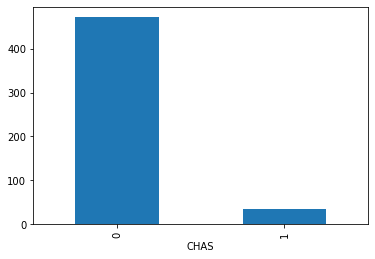

In [49]:
boston_df.groupby("CHAS").count().plot.bar(y="CRIM",legend=False)

In [60]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35-'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 - 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70+'

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

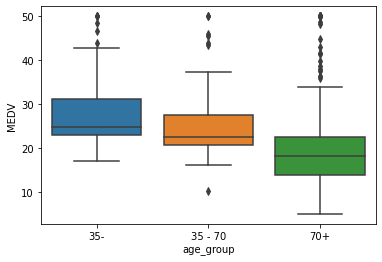

In [62]:
sns.boxplot(data=boston_df,x="age_group",y="MEDV", order=['35-','35 - 70','70+'])

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

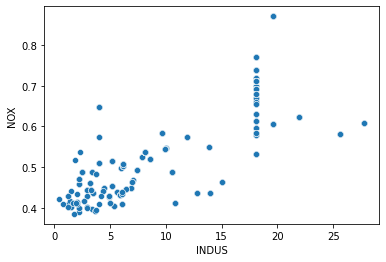

In [63]:
sns.scatterplot(data=boston_df, y="NOX",x="INDUS")

<AxesSubplot:ylabel='Frequency'>

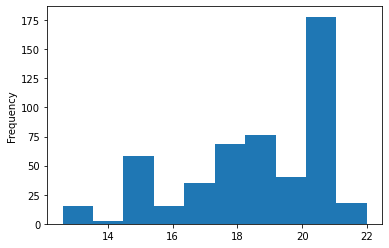

In [65]:
boston_df.PTRATIO.plot.hist()

## Questions
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Q1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- H0: There is no difference in median value of houses bounded by the Charles river 
- H1: There is difference in median value of houses bounded by the Charles river 

In [18]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

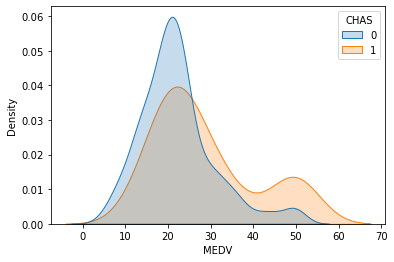

In [27]:
##CHAS
sns.kdeplot(data=boston_df, x="MEDV",hue="CHAS",common_norm=False,fill=True)

In [29]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

## P value is lower than 0.05: then variances are different

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [30]:
scipy.stats.ttest_ind( boston_df[boston_df['CHAS'] == 1]['MEDV'],
                       boston_df[boston_df['CHAS'] == 0]['MEDV'])
## P value is lower than 0.05=> reject H0=> Result: There is difference in median value of houses bounded by the Charles river

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Q2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
- H0 = There is no difference in MEDV for each proportion of owner occupied units built prior to 1940
- H1 = There is difference in MEDV for each proportion of owner occupied units built prior to 1940

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

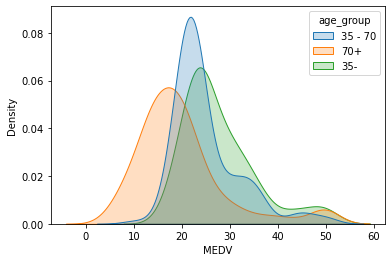

In [71]:
sns.kdeplot(data=boston_df, x="MEDV",hue="age_group",common_norm=False,fill=True)

In [69]:
scipy.stats.levene(boston_df[boston_df['age_group'] == "35-"]['MEDV'],
                   boston_df[boston_df['age_group'] == "35 - 70"]['MEDV'],
                   boston_df[boston_df['age_group'] == "70+"]['MEDV'],center='mean')
## P value higher than 0.05 so variances are same

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [70]:
scipy.stats.f_oneway(boston_df[boston_df['age_group'] == "35-"]['MEDV'],
                     boston_df[boston_df['age_group'] == "35 - 70"]['MEDV'],
                     boston_df[boston_df['age_group'] == "70+"]['MEDV'], )
## P value is lower than 0.05 => reject H0 => There is difference in MEDV for each proportion of owner occupied units built prior to 1940

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

### Q3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

- H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- H1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

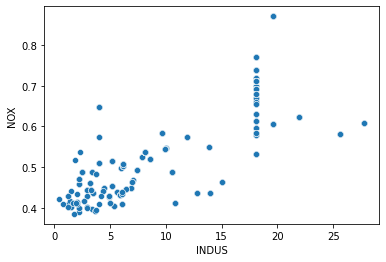

In [72]:
sns.scatterplot(data=boston_df, x="INDUS",y="NOX")

In [73]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
## P value is lower than 0.05 => reject H0 => there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

(0.7636514469209151, 7.913361061238693e-98)

### Q4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [75]:
import statsmodels.api as sm

In [77]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

## coeff = 10916

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        12:37:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""